In this lab, you will learn about linear regreesion, Python scikit-learn library and solve an exercise of predicting the Boston city house prices using a set of features.

Linear regreesion is the foundation machine learning algorithm that every machine learning engineer should learn. It is foundation of many algorithms, including logistic regreesion and neural network.

**The Model equation**
\begin{equation}
y =  b + w_{1}*x_{1} +w_{2}*x_{2} + \dots + w_n*x_{n}
\end{equation}

- y is the output variable (prediction)
- b is the bias term
- w1, w2, ... wn are model parameters
- x1, x2, ... xn are feature values.

Our aim is to learn the model parameters. Let's do it for a very simple case. Let's generate some random data points.

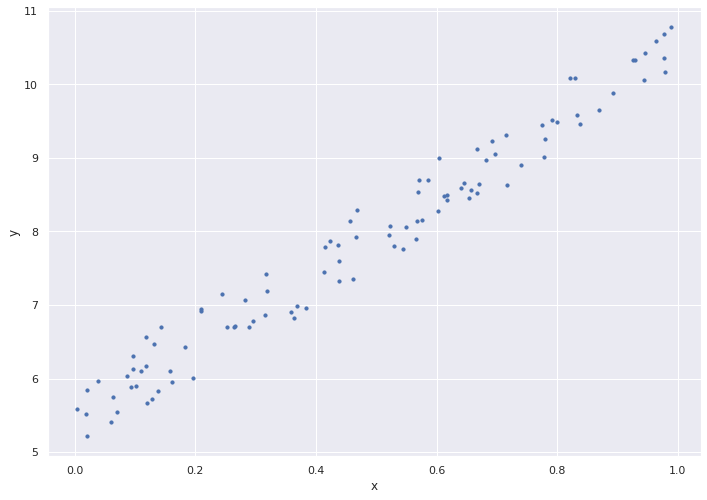

In [31]:
# imports
import numpy as np
import matplotlib.pyplot as plt
# generate random data-set
np.random.seed(0)
x = np.random.rand(100,1)
y = 6 + 5*(x) - np.random.rand(100, 1) # Just change this equations, and you can see the change in the plot, for example use np.square(x).

# plot
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In this exercise, we are not implementing the model from scratch, as it will take a lot of time, we will implement only 

**Scikit-learn** is the most powerful and useful python library for machine learning. It includes various classification, regreesion and clustering algorithms. It includes models such as support vector machine, K-NN, Random forests and others. It contains several datasets for regreesion and classification problems, you can also use performance metrics such as confusion matrix, root mean square error (RMSE). It can be integrated with python library Numpy arrays and Scipy. 
We will use this library to import linear regreesion model and performance metrics.

In [32]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # Import the linear regreesion model
from sklearn.metrics import mean_squared_error, r2_score # Import performance metrics, mean_squared_error (RMSE), and r2_score (Coefficient of determination)

Slope: [[5.06344894]]
Intercept: [5.44191998]
Root mean squared error:  0.07623324582874998
R2 score:  0.9654623515743881


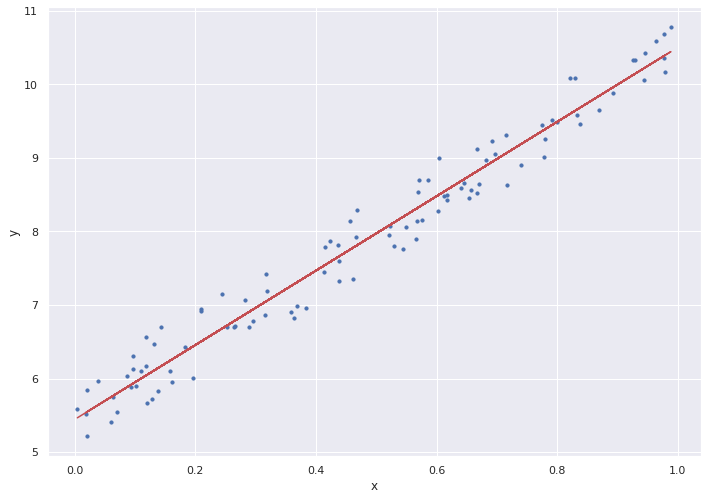

In [33]:
# sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

You can see that our model fits the data quite well, as the RMSE is small and r2_score is 0.9654 (which means our model learns about 96.5% of the variance in the data).

A real life example.
Predicting the House value at Boston House price dataset


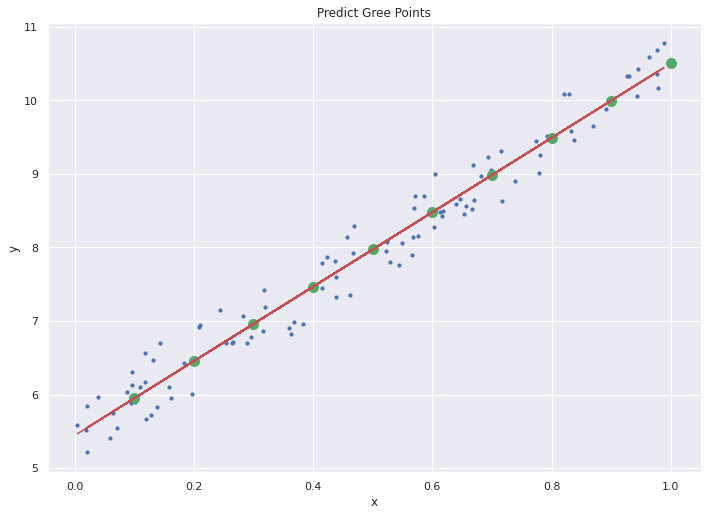

In [34]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
x1 = np.linspace(0.1,1,10).reshape((10,1))

y_predicted1 = regression_model.predict(x1)

plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values

plt.plot(x, y_predicted, color='r')
plt.scatter(x1, y_predicted1, color='g',s=100)
plt.title("Predict Gree Points")
plt.show()
%matplotlib inline

Pandas is a python library for interactive data analysis and manipulation. One of its powerful feature is dataframe and importing data from Comma Seprated Value CSV, JSON, SQL and microsoft excel. It provides merging, reshaping, selcecting and data cleaning features.
Seaborn is an interactive data visualization library built on top of matplotlib. It provides a high-level interface for data visualization.

In [35]:

from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston_dataset
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [36]:
boston_dataset.DESCR
a = boston_dataset.target

a

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [37]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names) # make this a dataframe with columns representing the 13 features
boston.head() # print first five rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [38]:
boston['MEDV'] = boston_dataset.target # this is the ouput variable, now we have 14 variables 13 features and one output.
boston.isnull().sum() # check for missing values ot NA.



CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


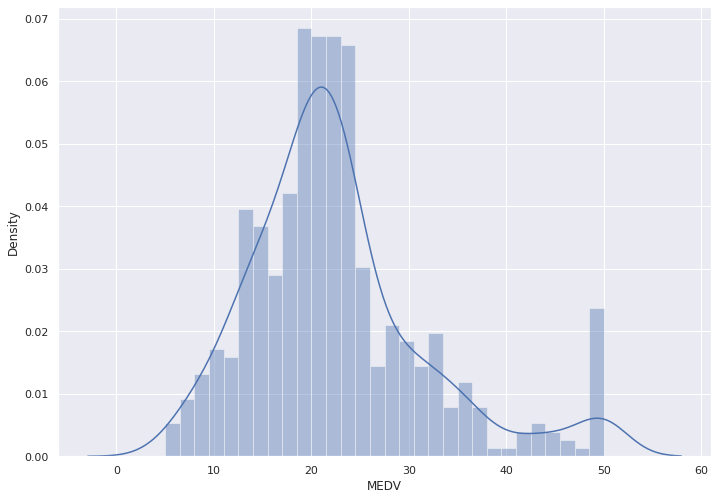

In [39]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) # Seaborn visualization
sns.distplot(boston['MEDV'], bins=30) # distribution plot for output variable
plt.show()

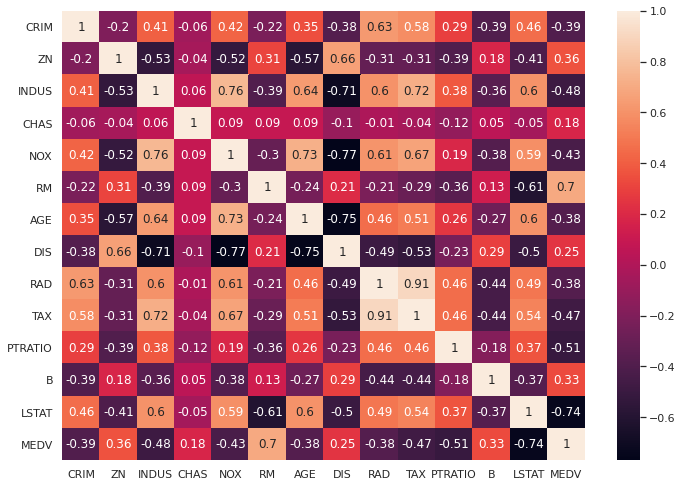

In [40]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

You can notice that it is 14*14 correlation matrix. The values are normalized between -1 and 1. Positive values show positive correlation and negative values show negative correlation and the range of values shows the strength of correlation.
Here you can see RM has a strong positive correlation and LSTAT has a strog negative correlation with MEDV. Let's use only these two features in our model.  

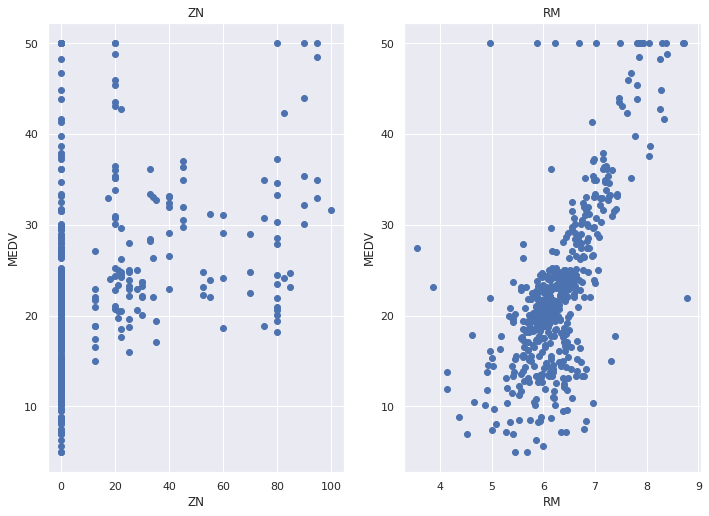

In [49]:

features = ['ZN', 'RM'] 
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

You can see the positive and negative correlation, however there are some outliers.

In [54]:
X = pd.DataFrame(np.c_[boston['ZN'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

Let's arrange the features and labels in X and Y variables respectively. Import train_test split from sklearn, use 80% data for training (406) and 20% for testing (102)

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 6.781749226364526
R2 score is 0.464595882593159


The model performance for testing set
--------------------------------------
RMSE is 5.016437536762286
R2 score is 0.6785872766708577


*We updated R2 Value using ZM and RM *

In [ ]:
--------------------------------------
RMSE is 5.637129335071195
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186952

You can also mount this notebook on google drive.

In [48]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


**Assignment** Try to improve the R2-score and reduce the RMSE.

**Hint** Try differnt set of features and see the results. Also you can change train-test split, try other ideas if you have. You can change the model as well.